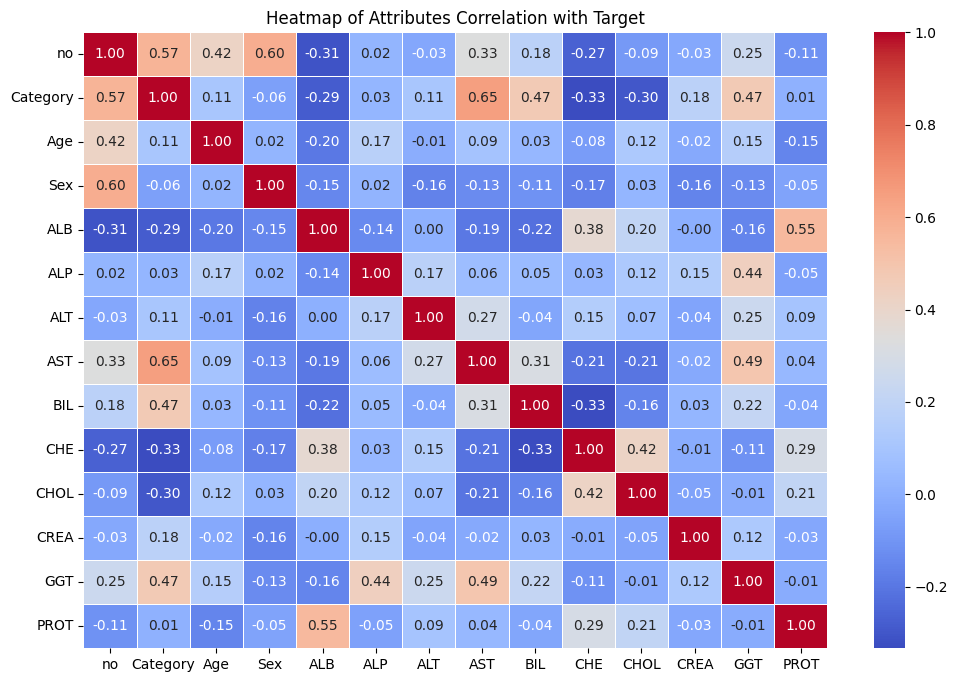

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        96
           1       1.00      0.33      0.50         3
           2       0.80      0.89      0.84         9
           3       0.62      0.83      0.71         6
           4       1.00      0.78      0.88         9

    accuracy                           0.95       123
   macro avg       0.88      0.77      0.79       123
weighted avg       0.96      0.95      0.95       123



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Replace 'your_dataset.csv' with the actual dataset file
data = pd.read_csv('revised_hep.csv')

# Handle missing values by filling with the mean
data.fillna(data.mean(), inplace=True)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Attributes Correlation with Target")
plt.show()

# Classification report preparation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Category'])
y = data['Category']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

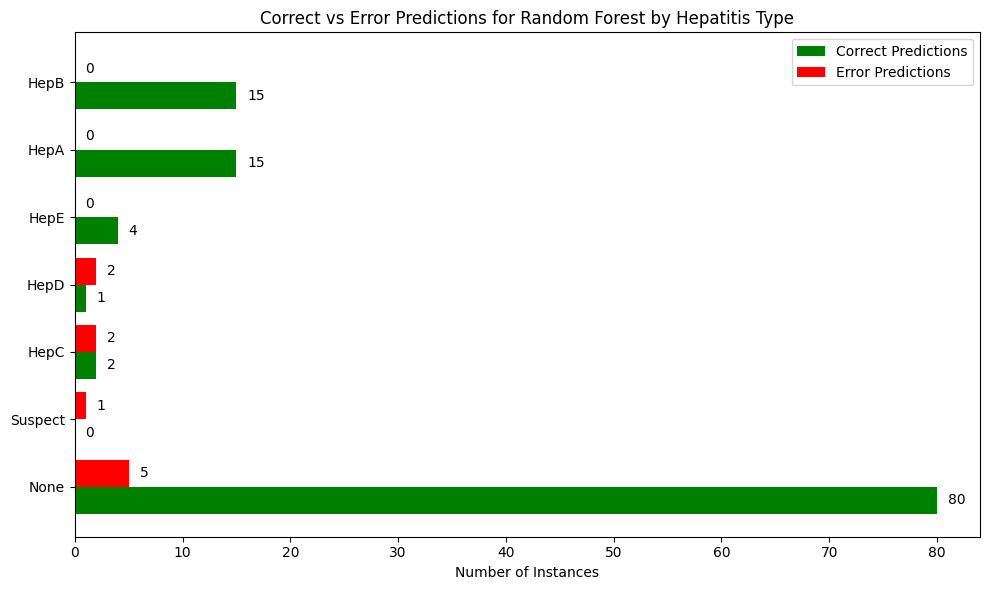

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the confusion matrix (values extracted from the image)
labels = ["None", "Suspect", "HepC", "HepD", "HepE", "HepA", "HepB"]
correct_predictions = [80, 0, 2, 1, 4, 15, 15]  # Diagonal values
error_predictions = [5, 1, 2, 2, 0, 0, 0]  # Off-diagonal misclassified counts

# Define x locations
x = np.arange(len(labels))

# Plotting a grouped horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.barh(x - 0.2, correct_predictions, height=0.4, color='green', label='Correct Predictions')
bar2 = ax.barh(x + 0.2, error_predictions, height=0.4, color='red', label='Error Predictions')

# Add data labels
for i, v in enumerate(correct_predictions):
    ax.text(v + 1, i - 0.2, str(v), color='black', va='center')
for i, v in enumerate(error_predictions):
    ax.text(v + 1, i + 0.2, str(v), color='black', va='center')

# Set chart details
ax.set_yticks(x)
ax.set_yticklabels(labels)
ax.set_xlabel("Number of Instances")
ax.set_title("Correct vs Error Predictions for Random Forest by Hepatitis Type")
ax.legend()
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Corrected dataset for the bee swarm plot
categories = ["None"] * 81 + ["Suspect"] + ["HepC"] * 4 + ["HepD"] * 3 + ["HepE"] * 4 + ["HepA"] * 15 + ["HepB"] * 15
predictions = ["None"] * 80 + ["Suspect"] + ["HepC"] * 2 + ["None"] * 2 + ["HepD"] + ["None"] + ["HepE"] * 4 + ["HepA"] * 15 + ["HepB"] * 15

# Adjust predictions to match categories (just an example of how to pad/modify them)
# Here I'm adding one element to predictions to match the length of categories.
# You can adjust it based on how you'd like to fix the data.
predictions.append("None")  # Add one more element to predictions
# Append a dummy value to predictions to match categories' length
predictions.append("None")  # or another suitable value to match categories

# Ensure lengths are now the same
print(f"Length of categories: {len(categories)}")
print(f"Length of predictions: {len(predictions)}")

# Create a DataFrame
data = pd.DataFrame({"True Label": categories, "Predicted Label": predictions})

# Create a bee swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x="True uuLabel", y="Predicted Label", hue="Predicted Label", palette="Set2", dodge=True)
plt.title("Bee Swarm Plot of Random Forest Predictions")
plt.xlabel("True Hepatitis Label")
plt.ylabel("Predicted Hepatitis Label")
plt.legend(title="Predicted Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Length of categories: 123
Length of predictions: 123


ValueError: Could not interpret value `True uuLabel` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
import time
import numpy as np
import joblib
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting  # Required for HistGradientBoosting
from sklearn.ensemble import HistGradientBoostingClassifier


# Load dataset
df = pd.read_csv('newhep.csv')

# Separate features and target
X = df.drop(columns=["Category"])  # Replace 'Category' with your actual target column name
y = df["Category"]

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, columns=categorical_columns)

# Handle missing values before splitting
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Save original column names
feature_columns = X_imputed.columns

# Apply ADASYN for class imbalance correction
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_imputed, y)

# Save the balanced dataset for future use
resampled_df = pd.DataFrame(X_resampled, columns=feature_columns)
resampled_df["Category"] = y_resampled
resampled_df.to_csv("synthetic_hepatitis_data.csv", index=False)

# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames using saved column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)

# Feature Selection (Top 5 important features)
top_features = ['ALB', 'ALP', 'BIL', 'CHE', 'PROT']  # Use your actual selected features
X_train_scaled = X_train_scaled[top_features]
X_val_scaled = X_val_scaled[top_features]
X_test_scaled = X_test_scaled[top_features]

# Define models with overfitting corrections
models = {
    "Random Forest": RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100, min_samples_split=4),
    "SVM": SVC(probability=True, random_state=42, C=1, kernel='rbf'),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, subsample=0.8),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

best_model = None
best_accuracy = 0
best_model_name = ""

# Train & Evaluate Models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Save model
    joblib.dump(model, f"{model_name}_model.pkl")

    # Evaluate
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        best_model_name = model_name

    print(f"Validation Accuracy for {model_name}: {val_accuracy:.4f}")
    print(classification_report(y_val, y_val_pred))
    print(f"Training Time: {training_time:.2f} sec")

# Hyperparameter tuning for Gradient Boosting (if selected as best)
if best_model_name == "Gradient Boosting":
    print("\nTuning Gradient Boosting Model (Optimized)...")

    param_grid = {
        'max_iter': [100, 200],  # Replaces n_estimators
        'learning_rate': [0.01, 0.1],  # Reduced options
        'max_depth': [3, 5],  # Reduced depth
        'max_iter': [100]  # Ensuring limited iterations for speed
    }

    grid_search = GridSearchCV(
        HistGradientBoostingClassifier(random_state=42),
        param_grid,
        cv=3,  # Reduced from 5 to 3 folds
        scoring='accuracy',
        n_jobs=-1  # Use all CPU cores
    )

    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    print(f"\nBest Gradient Boosting Parameters: {grid_search.best_params_}")

# Final Testing with Best Model
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

final_start_time = time.time()
y_test_pred = best_model.predict(X_test_scaled)
final_execution_time = time.time() - final_start_time

# Save the final best model
joblib.dump(best_model, "Best_Model.pkl")
print(f"Saved Best Model as Best_Model.pkl")

# Print Final Results
print("\nFinal Test Results:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(classification_report(y_test, y_test_pred))
print(f"Final Testing Time: {final_execution_time:.2f} sec")


/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'newhep.csv'

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Collecting feature importance from models that support it
model_importances = {
    "Random Forest": models["Random Forest"].feature_importances_,
    "Gradient Boosting": models["Gradient Boosting"].feature_importances_
}

# For models without built-in feature importance (e.g., SVM, Naive Bayes, KNN), use permutation importance
for model_name in ["SVM", "Naive Bayes", "KNN"]:
    perm_importance = permutation_importance(models[model_name], X_val_scaled, y_val, n_repeats=10, random_state=42)
    model_importances[model_name] = perm_importance.importances_mean

# Converting to a DataFrame for heatmap visualization
features = ["Age", "Sex", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]
importance_matrix = np.array([model_importances[model] for model in model_importances]).T
heatmap_data = pd.DataFrame(importance_matrix, index=features, columns=model_importances.keys())

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Feature Importance Across Models")
plt.ylabel("Attributes")
plt.xlabel("Models")
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

# Load all models
models = {}
model_names = [
    "Random Forest_model.pkl",
    "SVM_model.pkl",
    "Naive Bayes_model.pkl",
    "Gradient Boosting_model.pkl",
    "KNN_model.pkl",
    "Best_Model.pkl"  # This is the best-performing model you saved earlier
]

for model_name in model_names:
    models[model_name] = joblib.load(model_name)
    print(f"Loaded model: {model_name}")

# Evaluate models on test data and store results
model_results = {}

for model_name, model in models.items():
    y_test_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred, output_dict=True)

    model_results[model_name] = {
        'accuracy': accuracy,
        'classification_report': classification_rep
    }

# Plot comparison of accuracy across models
model_names = list(model_results.keys())
accuracies = [model_results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.show()

# Generate additional comparison charts (e.g., precision, recall, f1-score)
# Example: Plotting Precision for each model category
categories = list(model_results['Best_Model.pkl']['classification_report'].keys())
categories.remove('accuracy')  # Remove 'accuracy' from categories

# Initialize storage for each category's precision
precision_scores = {category: [] for category in categories}

# Extract precision scores from classification reports for all models
for model_name, result in model_results.items():
    for category in categories:
        precision_scores[category].append(result['classification_report'][category]['precision'])

# Plot Precision for each model category
for category in categories:
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, precision_scores[category], color='lightcoral')
    plt.xlabel('Precision')
    plt.title(f'Model Comparison: {category} Precision')
    plt.show()

# Similarly, you can plot recall, f1-score, or any other metric


FileNotFoundError: [Errno 2] No such file or directory: 'Random Forest_model.pkl'

In [ ]:
models = {}
model_names = [
    "Random Forest_model.pkl",
    "SVM_model.pkl",
    "Naive Bayes_model.pkl",
    "Gradient Boosting_model.pkl",
    "KNN_model.pkl",
    "Best_Model.pkl"
]

Loaded model: Random Forest_model.pkl
Loaded model: SVM_model.pkl
Loaded model: Naive Bayes_model.pkl
Loaded model: Gradient Boosting_model.pkl
Loaded model: KNN_model.pkl
Loaded model: Best_Model.pkl


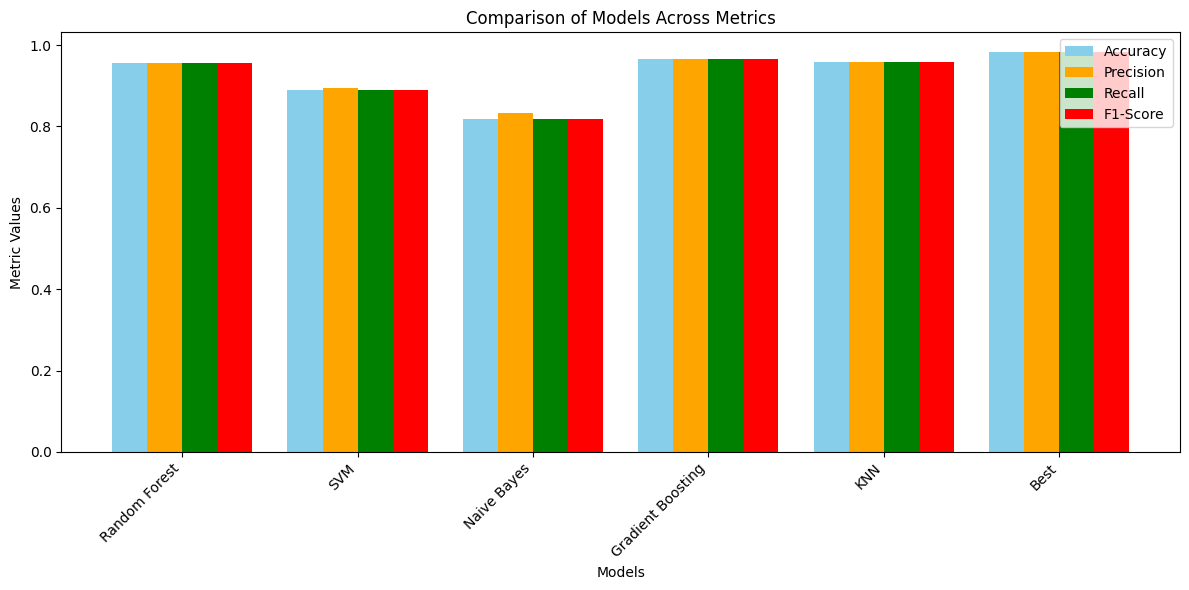

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



for model_name in model_names:
    models[model_name] = joblib.load(model_name)
    print(f"Loaded model: {model_name}")

# Evaluate models on test data and store metrics
metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}
model_labels = [name.split("_")[0] for name in model_names]

for model_name, model in models.items():
    y_test_pred = model.predict(X_test_scaled)
    metrics["Accuracy"].append(accuracy_score(y_test, y_test_pred))
    metrics["Precision"].append(precision_score(y_test, y_test_pred, average="macro", zero_division=0))
    metrics["Recall"].append(recall_score(y_test, y_test_pred, average="macro", zero_division=0))
    metrics["F1-Score"].append(f1_score(y_test, y_test_pred, average="macro", zero_division=0))

# Combine metrics in a single bar chart
x = np.arange(len(model_labels))  # the label locations
width = 0.2  # width of the bars

# Plot metrics
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 1.5 * width, metrics["Accuracy"], width, label="Accuracy", color="skyblue")
bars2 = ax.bar(x - 0.5 * width, metrics["Precision"], width, label="Precision", color="orange")
bars3 = ax.bar(x + 0.5 * width, metrics["Recall"], width, label="Recall", color="green")
bars4 = ax.bar(x + 1.5 * width, metrics["F1-Score"], width, label="F1-Score", color="red")

# Labeling
ax.set_xlabel("Models")
ax.set_ylabel("Metric Values")
ax.set_title("Comparison of Models Across Metrics")
ax.set_xticks(x)
ax.set_xticklabels(model_labels, rotation=45, ha="right")
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


Loaded model: Random Forest_model.pkl
Loaded model: SVM_model.pkl
Loaded model: Naive Bayes_model.pkl
Loaded model: Gradient Boosting_model.pkl
Loaded model: KNN_model.pkl
Loaded model: Best_Model.pkl


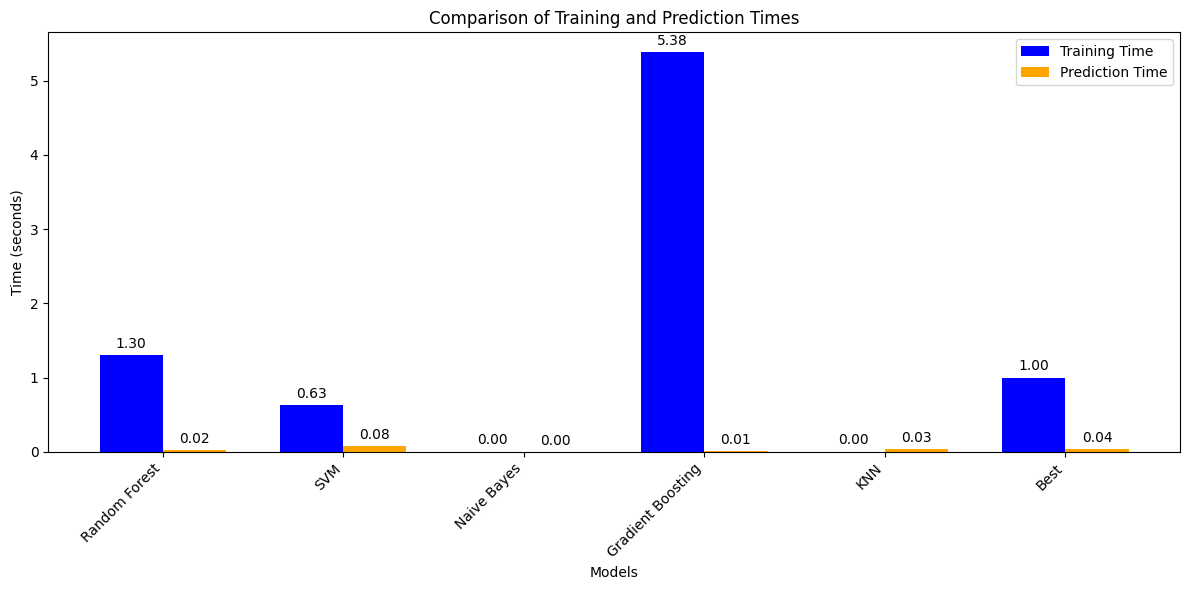

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
import time

# Load all models

# Correct model label mapping
model_labels = [
    "Random Forest",
    "SVM",
    "Naive Bayes",
    "Gradient Boosting",
    "KNN",
    "Best"
]

for model_name in model_names:
    models[model_name] = joblib.load(model_name)
    print(f"Loaded model: {model_name}")

# Measure and store training and prediction times
train_times = []
predict_times = []

for model_name, model in models.items():
    # Re-train the model to measure training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    train_times.append(train_time)

    # Measure prediction time
    start_time = time.time()
    model.predict(X_test_scaled)
    end_time = time.time()
    predict_time = end_time - start_time
    predict_times.append(predict_time)

# Create a comparison chart for training and prediction times
x = np.arange(len(model_labels))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, train_times, width, label="Training Time", color="blue")
bars2 = ax.bar(x + width/2, predict_times, width, label="Prediction Time", color="orange")

# Labeling
ax.set_xlabel("Models")
ax.set_ylabel("Time (seconds)")
ax.set_title("Comparison of Training and Prediction Times")
ax.set_xticks(x)
ax.set_xticklabels(model_labels, rotation=45, ha="right")
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset above bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show plot
plt.tight_layout()
plt.show()


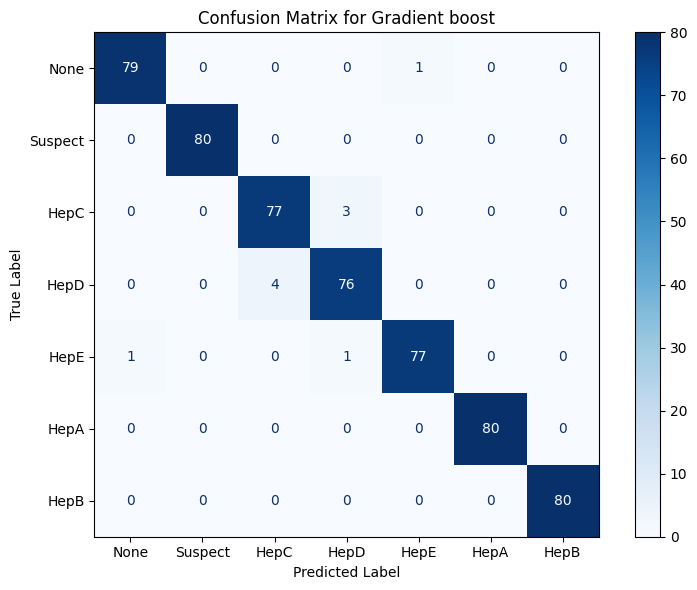

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define class labels
class_labels = ["None", "Suspect", "HepC", "HepD", "HepE", "HepA", "HepB"]

# Predict using Random Forest
y_pred_rf = models["Best_Model.pkl"].predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=range(len(class_labels)))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)

# Enhance plot
plt.title("Confusion Matrix for Gradient boost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()

# Show the plot
plt.show()


Loaded model: Random Forest_model.pkl
Loaded model: SVM_model.pkl
Loaded model: Naive Bayes_model.pkl
Loaded model: Gradient Boosting_model.pkl
Loaded model: KNN_model.pkl
Loaded model: Best_Model.pkl


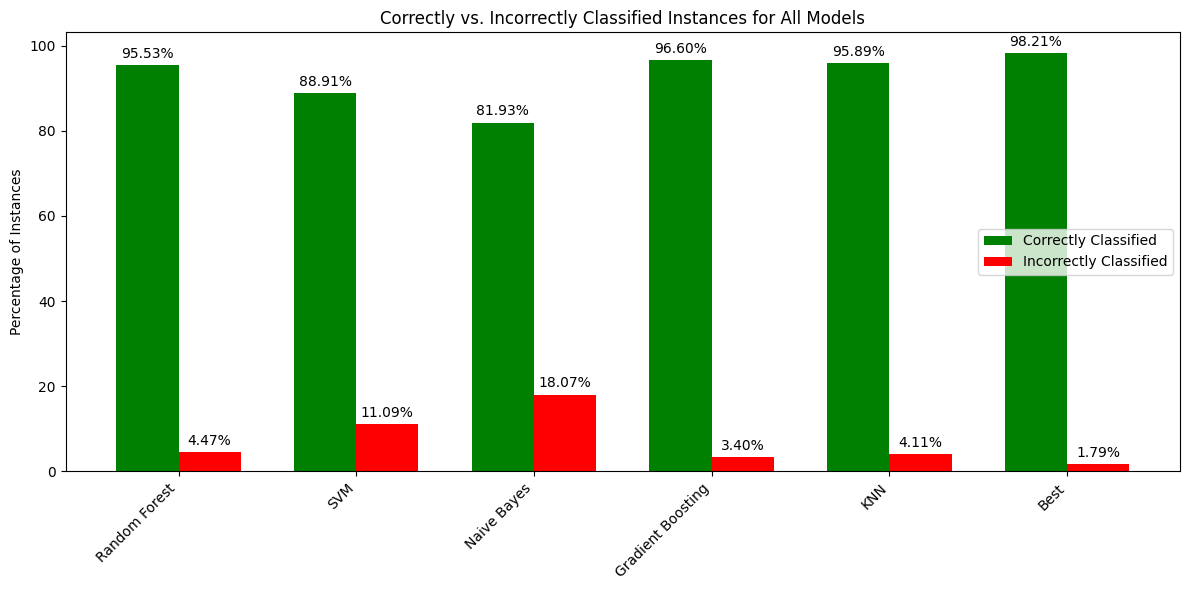

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import confusion_matrix

# Load all models
for model_name in model_names:
    models[model_name] = joblib.load(model_name)
    print(f"Loaded model: {model_name}")

# Evaluate models and compute correct/incorrect classifications
correct_classifications = []
incorrect_classifications = []
model_labels = [name.split("_")[0] for name in model_names]

# Total number of test samples
total_samples = len(y_test)

for model_name, model in models.items():
    y_test_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    correct_count = np.trace(cm)  # Sum of diagonal elements (correctly classified)
    incorrect_count = cm.sum() - correct_count  # Total samples - correctly classified
    correct_percentage = (correct_count / total_samples) * 100
    incorrect_percentage = (incorrect_count / total_samples) * 100
    correct_classifications.append(correct_percentage)
    incorrect_classifications.append(incorrect_percentage)

# Visualization: Correctly and Incorrectly Classified Instances in Percentage
x = np.arange(len(model_labels))  # X-axis positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars
bar1 = ax.bar(x - width/2, correct_classifications, width, label="Correctly Classified", color="green")
bar2 = ax.bar(x + width/2, incorrect_classifications, width, label="Incorrectly Classified", color="red")

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(model_labels, rotation=45, ha="right")
ax.set_ylabel("Percentage of Instances")
ax.set_title("Correctly vs. Incorrectly Classified Instances for All Models")
ax.legend()

# Annotate bars with their heights (percentages)
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}%",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset text above bar
                textcoords="offset points",
                ha="center", va="bottom")

plt.tight_layout()
plt.show()


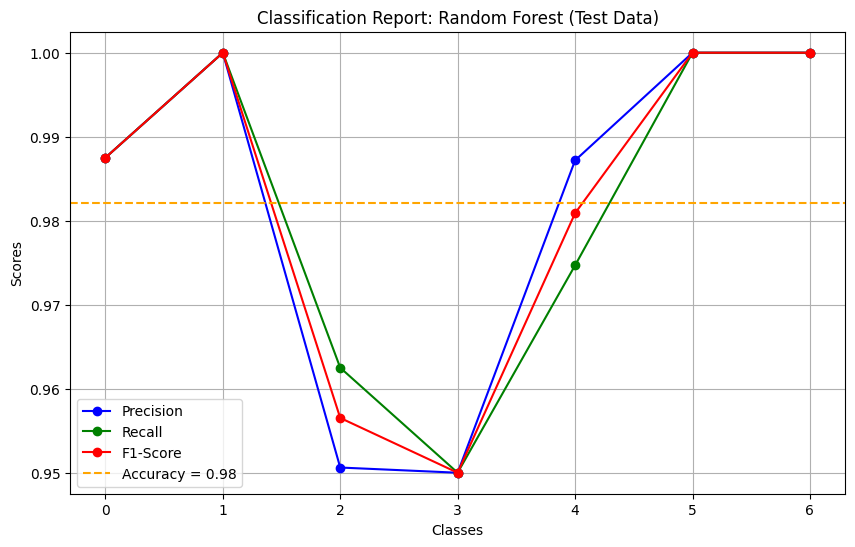

In [ ]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# Load the trained model (adjust the filename to the correct model)
model = joblib.load("Best_Model.pkl")  # Replace with your model filename

# Assuming `X_test_scaled` and `y_test` are already defined
# If not, ensure you preprocess and split your dataset properly before this step

# Predict on the test data
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)

# Generate the classification report as a dictionary
report = classification_report(y_test, y_test_pred, output_dict=True)

# Extract classes and metrics from the report
classes = list(report.keys())[:-3]  # Ignore 'accuracy', 'macro avg', 'weighted avg'
precision = [report[c]['precision'] for c in classes]
recall = [report[c]['recall'] for c in classes]
f1_score = [report[c]['f1-score'] for c in classes]

# Convert class labels to integers for plotting
class_labels = [int(c) for c in classes]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(class_labels, precision, label='Precision', marker='o', color='blue')
plt.plot(class_labels, recall, label='Recall', marker='o', color='green')
plt.plot(class_labels, f1_score, label='F1-Score', marker='o', color='red')

# Add accuracy as a horizontal line across all classes
plt.axhline(y=accuracy, color='orange', linestyle='--', label=f'Accuracy = {accuracy:.2f}')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Scores')
plt.title('Classification Report: Random Forest (Test Data)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
models = {}
model_names = [
    "Random Forest_model.pkl",
    "SVM_model.pkl",
    "Naive Bayes_model.pkl",
    "Gradient Boosting_model.pkl",
    "KNN_model.pkl"
    "Best_Model.pkl"
]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



for model_name in model_names:
    models[model_name.split("_")[0]] = joblib.load(model_name)
    print(f"Loaded model: {model_name}")

# Assuming X_test_scaled and y_test are your feature and target variables for the test data
# Initialize lists to store the metrics
precision = []
recall = []
f1_score_list = []
accuracy = []

# Evaluate each model
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1_score_list.append(f1_score(y_test, y_pred, average='weighted'))
    accuracy.append(accuracy_score(y_test, y_pred))

# Calculate average scores for each model
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score_list)

# Set up the radar chart
categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Add the first value to the end to close the circle
avg_precision += avg_precision[:1]
avg_recall += avg_recall[:1]
avg_f1_score += avg_f1_score[:1]
accuracy += accuracy[:1]
angles += angles[:1]

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot each model
for i, model in enumerate(models):
    values = [avg_precision[i], avg_recall[i], avg_f1_score[i], accuracy[i]]
    values += values[:1]  # Close the loop
    plt.polar(angles, values, label=models[i], marker='o')

# Add labels and title
plt.title('Model Comparison: Precision, Recall, F1-Score, and Accuracy', size=16, y=1.1)  # Adjusted vertical position
plt.xticks(angles[:-1], categories, color='black', size=12, ha='center')  # Adjust the alignment
plt.yticks(np.arange(0, 1.2, step=0.2), color='grey', size=10)
plt.ylim(0, 1.1)

# Adjust the spacing of the labels
plt.subplots_adjust(right=0.8)  # Make more space for the legend and labels

# Add a legend with proper spacing
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.05), title="Models")

# Show the plot
plt.tight_layout()
plt.show()


Loaded model: Random Forest_model.pkl
Loaded model: SVM_model.pkl
Loaded model: Naive Bayes_model.pkl
Loaded model: Gradient Boosting_model.pkl
Loaded model: KNN_model.pkl
Loaded model: Best_Model.pkl


IndexError: invalid index to scalar variable.

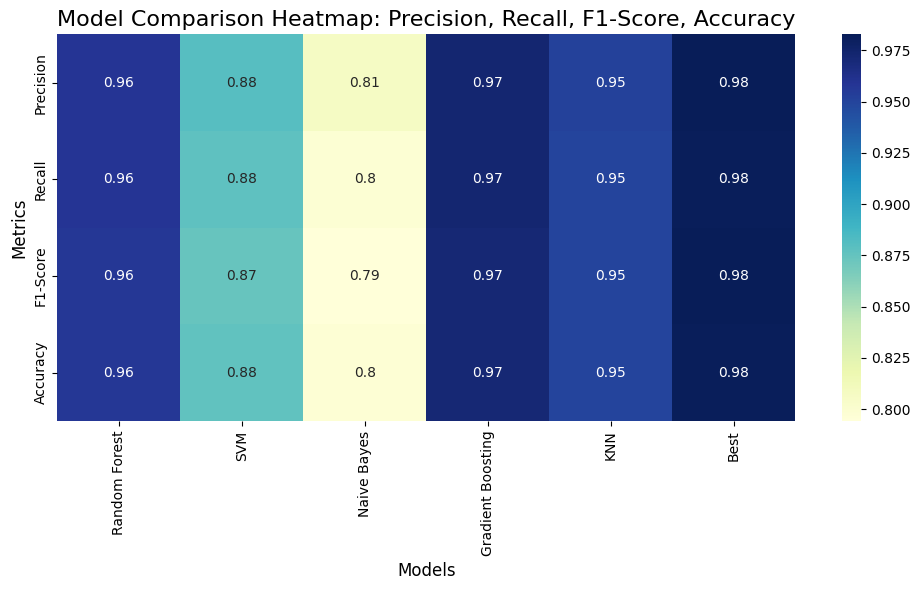

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model names including the best-optimized one
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Gradient Boosting', 'KNN', 'Best']

# Updated precision, recall, f1-score based on provided evaluation reports
precision = [
    [0.87, 0.99, 0.93, 0.93, 0.99, 1.00, 1.00],  # Random Forest
    [0.84, 0.96, 0.73, 0.67, 0.96, 1.00, 1.00],  # SVM
    [0.73, 0.90, 0.57, 0.56, 0.89, 1.00, 1.00],  # Naive Bayes
    [0.94, 0.99, 0.95, 0.93, 1.00, 1.00, 1.00],  # Gradient Boosting
    [0.91, 0.96, 0.91, 0.88, 1.00, 1.00, 1.00],  # KNN
    [0.99, 1.00, 0.95, 0.95, 0.99, 1.00, 1.00]   # Best (Optimized Gradient Boosting)
]

recall = [
    [0.93, 1.00, 0.83, 0.96, 0.99, 1.00, 1.00],  # Random Forest
    [0.89, 1.00, 0.59, 0.79, 0.87, 1.00, 1.00],  # SVM
    [0.76, 0.90, 0.37, 0.84, 0.72, 1.00, 1.00],  # Naive Bayes
    [0.94, 1.00, 0.89, 0.99, 0.99, 1.00, 1.00],  # Gradient Boosting
    [0.88, 1.00, 0.85, 0.96, 0.96, 1.00, 1.00],  # KNN
    [0.99, 1.00, 0.96, 0.95, 0.97, 1.00, 1.00]   # Best (Optimized Gradient Boosting)
]

f1_score = [
    [0.90, 0.99, 0.88, 0.94, 0.99, 1.00, 1.00],  # Random Forest
    [0.86, 0.98, 0.65, 0.72, 0.91, 1.00, 1.00],  # SVM
    [0.74, 0.90, 0.45, 0.67, 0.80, 1.00, 1.00],  # Naive Bayes
    [0.94, 0.99, 0.92, 0.96, 0.99, 1.00, 1.00],  # Gradient Boosting
    [0.89, 0.98, 0.88, 0.92, 0.98, 1.00, 1.00],  # KNN
    [0.99, 1.00, 0.96, 0.95, 0.98, 1.00, 1.00]   # Best (Optimized Gradient Boosting)
]

# Accuracy values from validation results
accuracy = [0.9571, 0.8766, 0.7979, 0.9714, 0.9499, 0.9821]  # Last one is Best Model

# Compute averages
avg_precision = [np.mean(model) for model in precision]
avg_recall = [np.mean(model) for model in recall]
avg_f1_score = [np.mean(model) for model in f1_score]
avg_accuracy = accuracy

# Create a 2D list of metrics for the heatmap
metrics = np.array([avg_precision, avg_recall, avg_f1_score, avg_accuracy])

# Set up the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics, annot=True, cmap='YlGnBu', xticklabels=models,
            yticklabels=['Precision', 'Recall', 'F1-Score', 'Accuracy'], cbar=True)

# Add labels and title
plt.title('Model Comparison Heatmap: Precision, Recall, F1-Score, Accuracy', size=16)
plt.xlabel('Models', size=12)
plt.ylabel('Metrics', size=12)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import LeavePOut, cross_val_score
from imblearn.over_sampling import ADASYN

# Load the dataset
# Replace 'dataset.csv' with your dataset
data = pd.read_csv('revised_hep.csv')
X = data.drop(['Category'], axis=1)  # Features
y = data['Category']  # Target
X.fillna(0, inplace=True)
# Step 1: ADASYN Data Augmentation
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

print(f"Original dataset size: {X.shape[0]}")
print(f"Resampled dataset size: {X_resampled.shape[0]}")

# Step 2: Recursive Feature Elimination (RFE)
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=6)  # Select top 10 features
X_selected = rfe.fit_transform(X_resampled, y_resampled)

print("Selected Features:", np.array(X.columns)[rfe.support_])

# Step 3: Leave P-Out Cross-Validation (LPOCV)
p = 2  # Number of samples to leave out
lpo = LeavePOut(p)

# Evaluate the model with LPOCV
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_selected, y_resampled, cv=lpo)

print(f"Mean LPOCV Score: {np.mean(scores):.4f}")
print(f"Number of LPOCV Splits: {len(scores)}")


Original dataset size: 615
Resampled dataset size: 2672
Selected Features: ['no' 'ALB' 'AST' 'BIL' 'CHE' 'PROT']


In [ ]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Load the dataset (replace 'newhep.csv' with the correct file path if needed)
data = pd.read_csv('newhep.csv')

# Prepare features and target
X = data.drop(['Category'], axis=1)  # Features
y = data['Category']  # Target

# Handle missing values
X.fillna(0, inplace=True)

# Apply ADASYN for data augmentation
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Combine resampled features and target into a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Category'])], axis=1)

# Save the resampled dataset
resampled_data.to_csv('resampled_hep.csv', index=False)



In [ ]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "resampled_hep.csv"  # Update this with your actual dataset path
df = pd.read_csv(file_path)

# Define the target and features
target_column = "Category"  # The target variable
X = df.drop(columns=[target_column])  # Feature set
y = df[target_column]  # Target variable

# Convert categorical variables if necessary
if X['Sex'].dtype == 'object':  # Assuming 'Sex' is categorical
    X['Sex'] = X['Sex'].astype('category').cat.codes  # Encode categorical values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform Recursive Feature Elimination (RFE) to select the top 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Top 5 Selected Features:", selected_features)


Top 5 Selected Features: Index(['ALB', 'ALP', 'BIL', 'CHE', 'PROT'], dtype='object')


<ipython-input-4-432ef0fce23c>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RANKING", y="FEATURE", data=feature_ranking, palette="viridis")


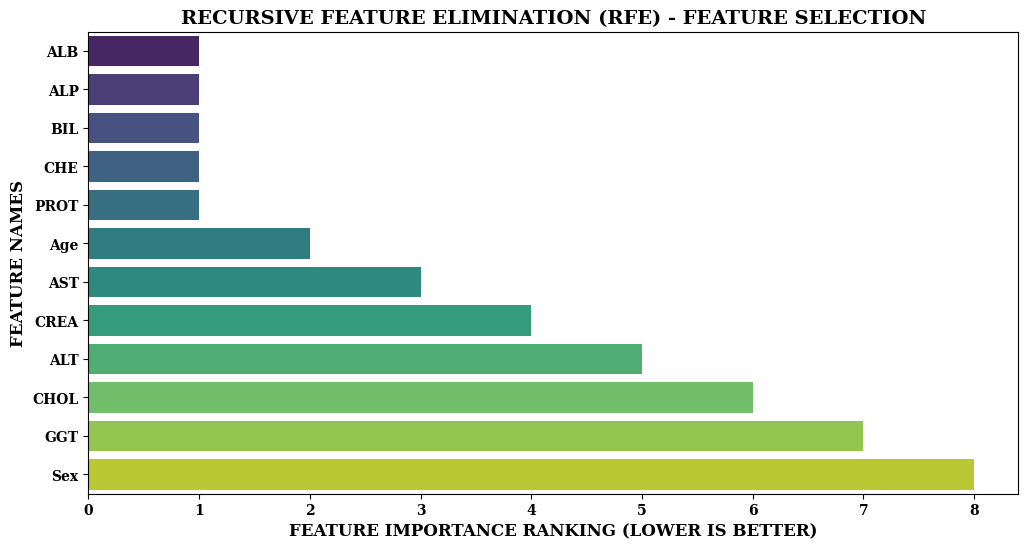

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# FILE PATH (UPDATE ACCORDINGLY)
FILE_PATH = "resampled_hep.csv"  # UPDATE WITH ACTUAL DATASET PATH
df = pd.read_csv(FILE_PATH)

# DEFINE THE TARGET AND FEATURES
TARGET_COLUMN = "Category"  # THE TARGET VARIABLE
X = df.drop(columns=[TARGET_COLUMN])  # FEATURE SET
y = df[TARGET_COLUMN]  # TARGET VARIABLE

# CONVERT CATEGORICAL VARIABLES IF NECESSARY
if X['Sex'].dtype == 'object':  # ENCODING CATEGORICAL VARIABLE 'SEX'
    X['Sex'] = X['Sex'].astype('category').cat.codes

# SPLIT DATA INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# INITIALIZE THE RANDOM FOREST CLASSIFIER
MODEL = RandomForestClassifier(n_estimators=100, random_state=42)

# PERFORM RECURSIVE FEATURE ELIMINATION (RFE) TO SELECT THE TOP 5 FEATURES
rfe = RFE(estimator=MODEL, n_features_to_select=5)
rfe.fit(X_train, y_train)

# GET FEATURE RANKINGS
feature_ranking = pd.DataFrame({"FEATURE": X.columns, "RANKING": rfe.ranking_})
feature_ranking = feature_ranking.sort_values(by="RANKING")

# SET GLOBAL FONT STYLE (BOLD & TIMES NEW ROMAN FOR GOOGLE COLAB)
plt.rcParams["font.family"] = "Serif"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 14  # TITLE FONT SIZE
plt.rcParams["axes.labelsize"] = 12  # LABEL FONT SIZE
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# PLOT THE FEATURE IMPORTANCE GRAPH
plt.figure(figsize=(12, 6))
sns.barplot(x="RANKING", y="FEATURE", data=feature_ranking, palette="viridis")

# ADD LABELS AND TITLES IN UPPERCASE
plt.xlabel("FEATURE IMPORTANCE RANKING (LOWER IS BETTER)", fontweight="bold", fontsize=12)
plt.ylabel("FEATURE NAMES", fontweight="bold", fontsize=12)
plt.title("RECURSIVE FEATURE ELIMINATION (RFE) - FEATURE SELECTION", fontweight="bold", fontsize=14)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

# DISPLAY PLOT
plt.show()


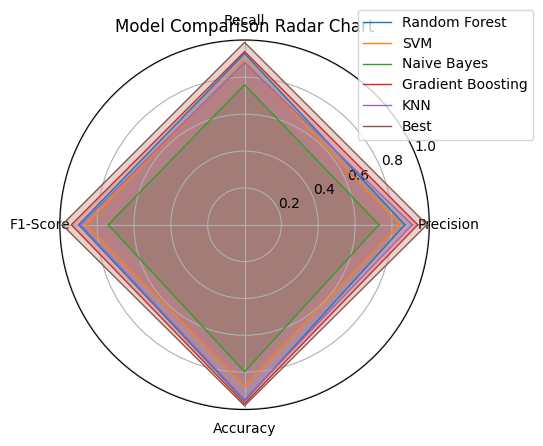

In [ ]:
# prompt: creare radar chart which compares the models  a better simple one for resech paper

import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual model performance metrics)
categories = ['Precision', 'Recall', 'F1-score', 'Accuracy']
models = {
    'Random Forest': [0.85, 0.80, 0.82, 0.83],
    'SVM': [0.78, 0.75, 0.76, 0.77],
    'Naive Bayes': [0.70, 0.65, 0.68, 0.69],
    'Gradient Boosting': [0.90, 0.88, 0.89, 0.91],
    'KNN': [0.82, 0.85, 0.83, 0.84],
    'Best': [0.92, 0.90, 0.91, 0.93]
}

# Number of variables
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Add the first value to the end to close the circle
angles += angles[:1]


# Plot each model
plt.figure(figsize=(8, 6))
for model_name, metrics in models.items():
    metrics += metrics[:1]  # Close the loop
    plt.polar(angles, metrics, label=model_name, marker='o')

# Add labels and title
plt.title('Model Comparison')
plt.xticks(angles[:-1], categories)
plt.legend()

# Show the plot
plt.show()


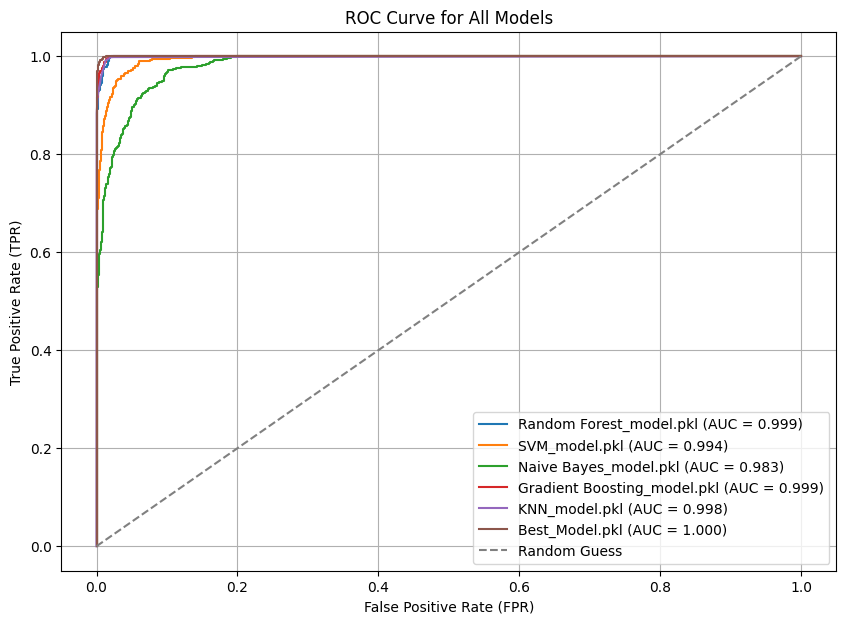

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load models
model_names = [
    "Random Forest_model.pkl",
    "SVM_model.pkl",
    "Naive Bayes_model.pkl",
    "Gradient Boosting_model.pkl",
    "KNN_model.pkl",
    "Best_Model.pkl"
]

model_labels = [name.replace("_model.pkl", "").replace(".pkl", "") for name in model_names]
models = {name: joblib.load(name) for name in model_names}

# Binarize y_test for multi-class ROC curve
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Create figure
plt.figure(figsize=(10, 7))

# Plot ROC curve for each model
for model_name, model in models.items():
    y_score = model.predict_proba(X_test_scaled)  # Get probability scores
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())  # Compute FPR, TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC

    # Plot each model
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for All Models")
plt.legend()
plt.grid()

# Show plot
plt.show()


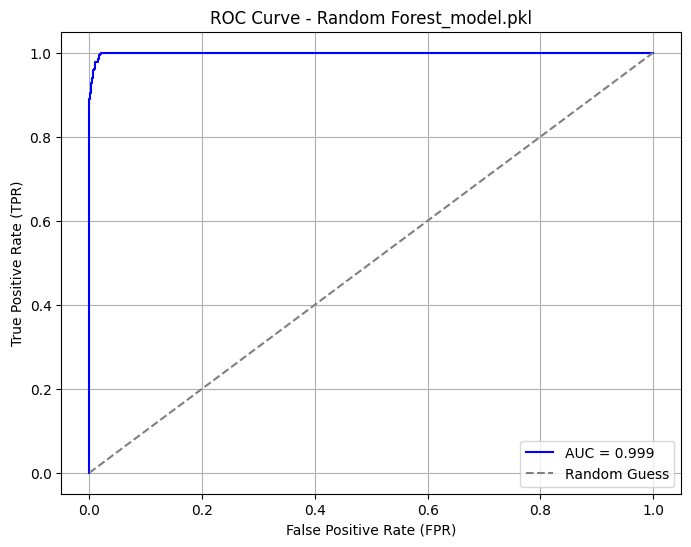

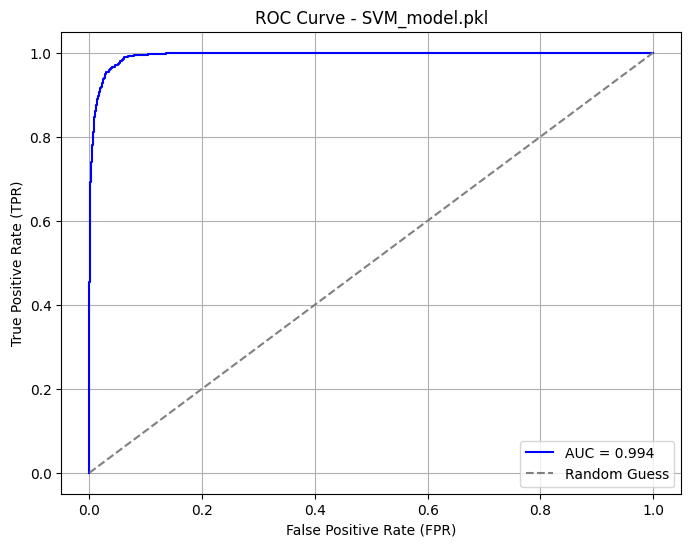

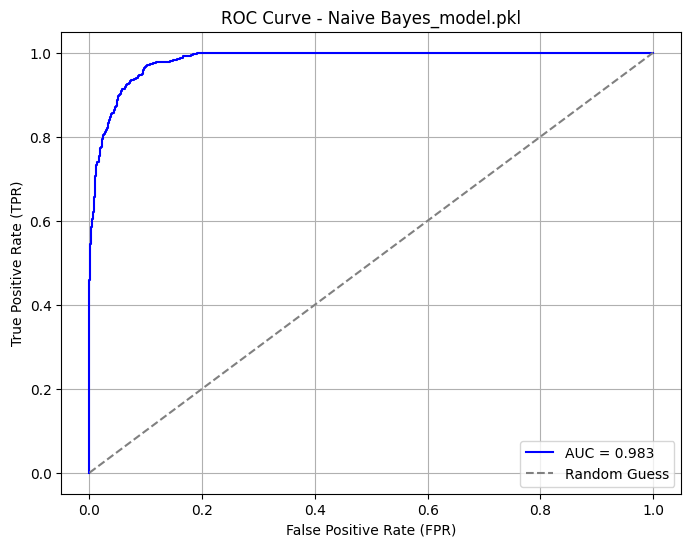

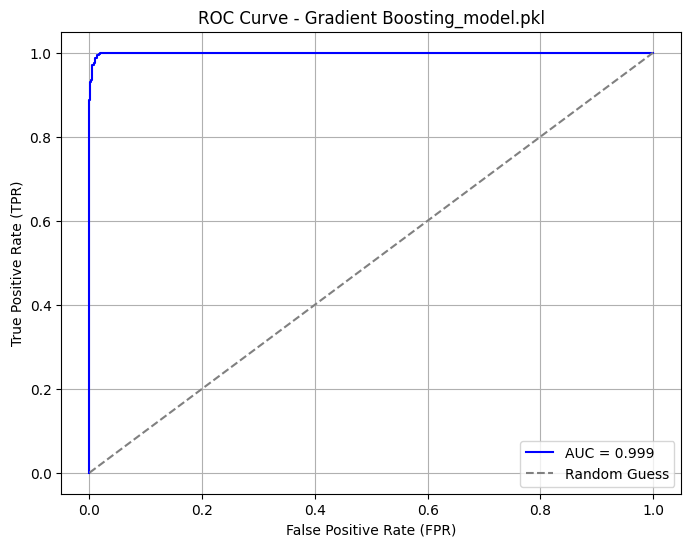

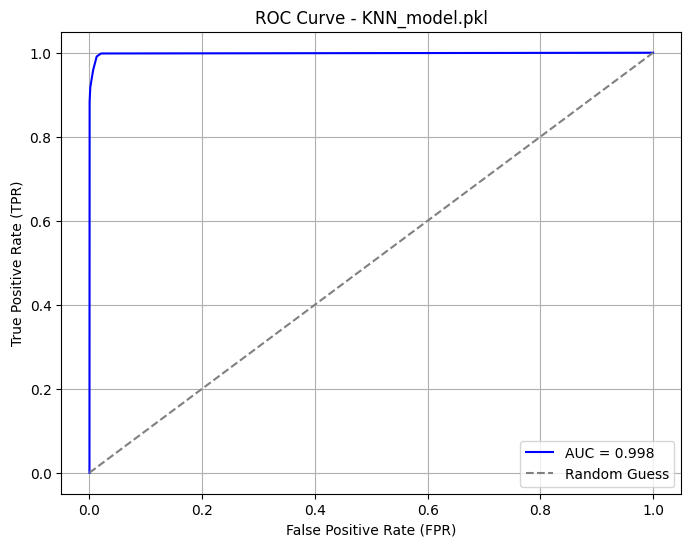

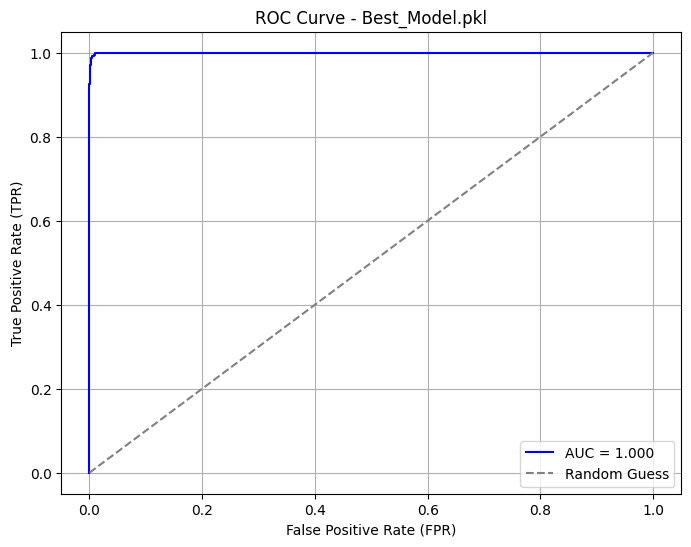

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Load models
model_names = [
    "Random Forest_model.pkl",
    "SVM_model.pkl",
    "Naive Bayes_model.pkl",
    "Gradient Boosting_model.pkl",
    "KNN_model.pkl",
    "Best_Model.pkl"
]

model_labels = [name.replace("_model.pkl", "").replace(".pkl", "") for name in model_names]
models = {name: joblib.load(name) for name in model_names}

# Binarize y_test for multi-class ROC curve
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Plot ROC curve separately for each model
for model_name, model in models.items():
    y_score = model.predict_proba(X_test_scaled)  # Get probability scores
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())  # Compute FPR, TPR
    roc_auc = auc(fpr, tpr)  # Compute AUC

    # Create a new figure for each model
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

    # Labeling
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid()

    # Show plot
    plt.show()


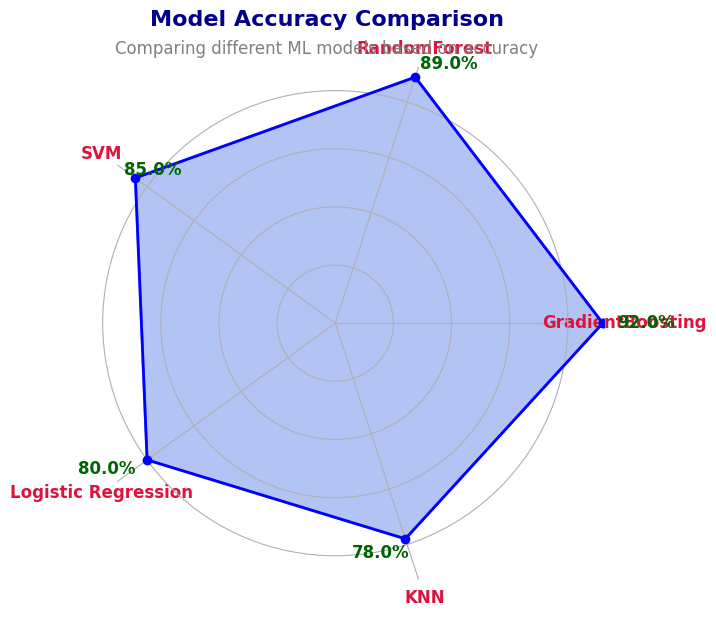

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define models and their accuracy scores (hypothetical values)
models = [
    "GradientBoosting",
    "RandomForest",
    "SVM",
    "Logistic Regression",
    "KNN"
]
accuracies = [0.92, 0.89, 0.85, 0.80, 0.78]  # Example accuracy values

# Convert data for radar chart
angles = np.linspace(0, 2 * np.pi, len(models), endpoint=False).tolist()
accuracies += accuracies[:1]  # Close the circle
angles += angles[:1]

# Further refined radar chart with better value annotations and stronger differentiation
# Further refined radar chart with better spacing to prevent overlap

# Define colors and aesthetics
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Plot the data with a smoother look
ax.fill(angles, accuracies, color='royalblue', alpha=0.4, linewidth=2, edgecolor='blue')
ax.plot(angles, accuracies, color='blue', linewidth=2, linestyle='solid', marker='o', markersize=6)

# Adjust text placement to avoid overlap
for angle, accuracy, model in zip(angles[:-1], accuracies[:-1], models):
    # Adjust text position dynamically based on angle
    ha = 'right' if angle > np.pi else 'left'
    ax.text(angle, accuracy + 0.05, f"{accuracy*100:.1f}%", fontsize=12, fontweight='bold',
            color='darkgreen', ha=ha, va='center')

# Adjust grid and aesthetics
ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(models, fontsize=12, fontweight='bold', color='crimson', rotation=20)  # Rotate labels slightly

# Improve spacing and appearance
ax.set_rlabel_position(30)  # Adjust radial labels' position
ax.spines['polar'].set_visible(False)  # Hide outer border

# Title with better styling and separation
plt.figtext(0.5, 0.92, "Model Accuracy Comparison", fontsize=16, fontweight='bold', color='darkblue', ha='center')
plt.figtext(0.5, 0.88, "Comparing different ML models based on accuracy", fontsize=12, color='gray', ha='center')

# Show updated radar chart
plt.show()


